<a href="https://colab.research.google.com/github/JeroBernat/Actividad-3/blob/main/Actividad3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
#Importamos las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [40]:
#Cargamos el archivo csv en un dataframe
data = pd.read_csv("VentasTotales_sin_nulos.csv")

In [41]:
#Visualización del frame
data.head(3)

,Unnamed: 0,indice_tiempo,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros
0,0,01/01/2017,27858.9,27477.3,27858872.08,27591730.13,267141.956,27858872.08,1.023010e+07,6864575.384,...,6705475.318,9.459063e+05,2880656.169,2606192.942,1050313.638,340777.3882,4397543.671,772371.8476,1838507.096,2806660.309
1,1,01/02/2017,25994.2,25223.4,25994200.17,25749179.40,245020.769,25994200.17,9.719067e+06,6438494.011,...,6576624.803,9.256186e+05,2855639.900,2600083.591,1026166.544,328288.6951,4053283.771,672290.5165,1257661.903,2354084.901
2,2,01/03/2017,27780.0,26334.3,27780006.52,27472228.72,307777.804,27780006.52,1.024444e+07,6908522.962,...,7437264.174,1.016148e+06,3188259.169,2824976.726,1075525.842,353335.1548,4354197.611,667696.6653,1305674.917,2266189.277


In [42]:
#Hacemos copia del frame
data1 = data.copy()

In [43]:
#Verificar que no contenga valores nulos
print(data1.isnull().sum()) #No hay valores nulos


Unnamed: 0                             0
indice_tiempo                          0
ventas_precios_corrientes              0
ventas_precios_constantes              0
ventas_totales_canal_venta             0
salon_ventas                           0
canales_on_line                        0
ventas_totales_medio_pago              0
efectivo                               0
tarjetas_debito                        0
tarjetas_credito                       0
otros_medios                           0
ventas_totales_grupo_articulos         0
subtotal_ventas_alimentos_bebidas      0
bebidas                                0
almacen                                0
panaderia                              0
lacteos                                0
carnes                                 0
verduleria_fruteria                    0
alimentos_preparados_rotiseria         0
articulos_limpieza_perfumeria          0
indumentaria_calzado_textiles_hogar    0
electronicos_articulos_hogar           0
otros           

#Método de IQR

##Columna "ventas_precios_corrientes"

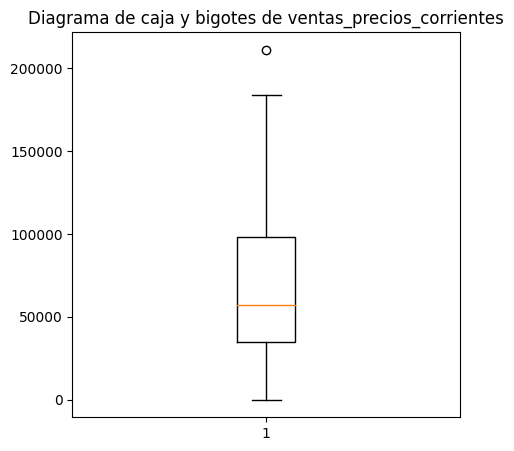

In [44]:
#Diagrama de caja y bigotes
fig = plt.figure(figsize=(5,5)) #Tamaño de la gráfica (largo x alto)
plt.boxplot(x=data1["ventas_precios_corrientes"]) #Le indicamos la variable a graficar
plt.title("Diagrama de caja y bigotes de ventas_precios_corrientes") #Título de la gráfica
plt.show() #Imprimimos

In [45]:
#Identificamos outliers
y = data1["ventas_precios_corrientes"]

percentile25 = y.quantile(0.25) #Q1
percentile75 = y.quantile(0.75) #Q3

iqr = percentile75 - percentile25 #50% de los datos

limite_superior_iqr = percentile75 + 1.5*iqr
limite_inferior_iqr = percentile25 - 1.5*iqr

print("Límite superior:",round(limite_superior_iqr,1))
print("Límite inferior:",round(limite_inferior_iqr,1))

#Encontramos los outliers de la columan "Precio Venta"
outliers = data1[(data1["ventas_precios_corrientes"]>limite_superior_iqr)|(data1["ventas_precios_corrientes"]<limite_inferior_iqr)]
outliers #Ahora si nos arroja los 4 datos que logramos identificar en el diagrama de caja y bigote

Límite superior: 192319.4
Límite inferior: -59178.7


,Unnamed: 0,indice_tiempo,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros
42,42,01/07/2020,211140.7,50791.4,81140696.22,76413721.76,4726974.457,81140696.22,24935747.29,22143208.63,...,23393038.41,2630487.791,9592798.115,8463266.123,2712593.828,518942.5376,11217153.19,2502616.619,6125265.839,5935993.913


In [46]:
#Obtenemos el dataframe sin datos atípicos
clean_data1 = data1[(data1["ventas_precios_corrientes"]<=limite_superior_iqr)&(data1["ventas_precios_corrientes"]>=limite_inferior_iqr)]

#Pasamos el frame a un archivo csv
clean_data1.to_csv("clean_data1_act3.csv")

#Descargar archivo
from google.colab import files

files.download("clean_data1_act3.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##Columna "ventas_precios_constantes"

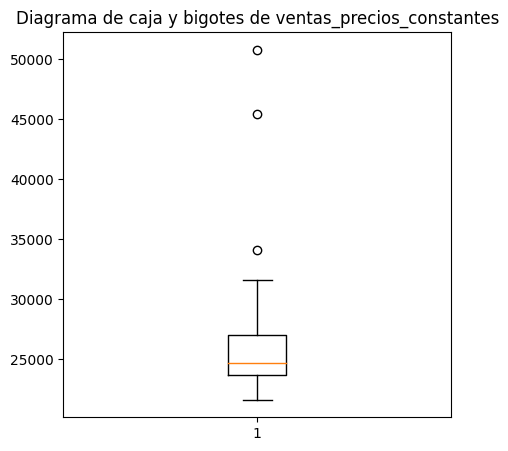

In [47]:
#Diagrama de caja y bigotes
fig = plt.figure(figsize=(5,5)) #Tamaño de la gráfica (largo x alto)
plt.boxplot(x=data1["ventas_precios_constantes"]) #Le indicamos la variable a graficar
plt.title("Diagrama de caja y bigotes de ventas_precios_constantes") #Título de la gráfica
plt.show() #Imprimimos

In [48]:
#Identificamos outliers
y = data1["ventas_precios_constantes"]

percentile25 = y.quantile(0.25) #Q1
percentile75 = y.quantile(0.75) #Q3

iqr = percentile75 - percentile25 #50% de los datos

limite_superior_iqr = percentile75 + 1.5*iqr
limite_inferior_iqr = percentile25 - 1.5*iqr

print("Límite superior:",round(limite_superior_iqr,1))
print("Límite inferior:",round(limite_inferior_iqr,1))

#Encontramos los outliers de la columan "Precio Venta"
outliers = data1[(data1["ventas_precios_constantes"]>limite_superior_iqr)|(data1["ventas_precios_constantes"]<limite_inferior_iqr)]
outliers #Ahora si nos arroja los 4 datos que logramos identificar en el diagrama de caja y bigote

Límite superior: 31938.8
Límite inferior: 18759.9


,Unnamed: 0,indice_tiempo,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros
11,11,01/12/2017,40766.3,34084.5,4.076632e+07,4.032029e+07,4.460368e+05,4.076632e+07,13710305.37,11070098.74,...,9.667850e+06,1346130.813,3.684165e+06,3.674954e+06,1398334.689,4.762751e+05,5.239243e+06,1278355.018,2.857323e+06,4.502834e+06
42,42,01/07/2020,211140.7,50791.4,8.114070e+07,7.641372e+07,4.726974e+06,8.114070e+07,24935747.29,22143208.63,...,2.339304e+07,2630487.791,9.592798e+06,8.463266e+06,2712593.828,5.189425e+05,1.121715e+07,2502616.619,6.125266e+06,5.935994e+06
60,60,01/01/2022,154517.1,45463.4,1.545171e+08,1.496976e+08,4.819480e+06,1.545171e+08,46962602.22,46053650.13,...,3.750517e+07,4860317.680,1.610477e+07,1.740849e+07,6138441.197,1.401929e+06,2.133021e+07,3782646.219,1.218755e+07,1.343307e+07


In [49]:
#Obtenemos el dataframe sin datos atípicos
clean_data2 = data1[(data1["ventas_precios_constantes"]<=limite_superior_iqr)&(data1["ventas_precios_constantes"]>=limite_inferior_iqr)]

#Pasamos el frame a un archivo csv
clean_data2.to_csv("clean_data2_act3.csv")

#Descargar archivo
from google.colab import files

files.download("clean_data2_act3.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##Columna "tarjetas_credito"

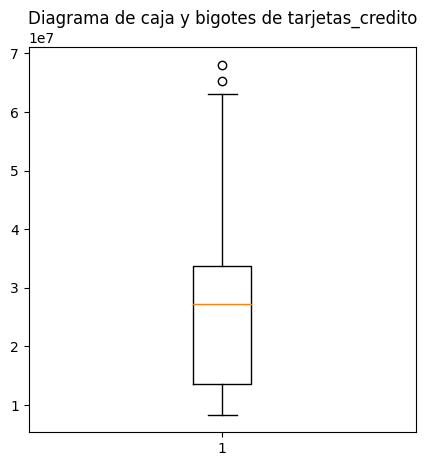

In [50]:
#Diagrama de caja y bigotes
fig = plt.figure(figsize=(5,5)) #Tamaño de la gráfica (largo x alto)
plt.boxplot(x=data1["tarjetas_credito"]) #Le indicamos la variable a graficar
plt.title("Diagrama de caja y bigotes de tarjetas_credito") #Título de la gráfica
plt.show() #Imprimimos

In [51]:
#Identificamos outliers
y = data1["tarjetas_credito"]

percentile25 = y.quantile(0.25) #Q1
percentile75 = y.quantile(0.75) #Q3

iqr = percentile75 - percentile25 #50% de los datos

limite_superior_iqr = percentile75 + 1.5*iqr
limite_inferior_iqr = percentile25 - 1.5*iqr

print("Límite superior:",round(limite_superior_iqr,1))
print("Límite inferior:",round(limite_inferior_iqr,1))

#Encontramos los outliers de la columan "Precio Venta"
outliers = data1[(data1["tarjetas_credito"]>limite_superior_iqr)|(data1["tarjetas_credito"]<limite_inferior_iqr)]
outliers #Ahora si nos arroja los 4 datos que logramos identificar en el diagrama de caja y bigote

Límite superior: 63856184.1
Límite inferior: -16515482.2


,Unnamed: 0,indice_tiempo,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros
63,63,01/04/2022,177148.1,24140.5,177148082.8,173003799.1,4144283.743,177148082.8,53189998.68,50063972.79,...,49991675.91,6746166.557,19309461.59,22877841.24,6510665.781,1719458.547,23131265.85,4228053.874,3215054.70,11910475.62
64,64,01/05/2022,179639.2,23234.2,179639238.6,175358487.5,4280751.113,179639238.6,52738110.62,49886787.86,...,50150351.46,6667329.665,20121124.43,22841532.85,6314109.470,1779482.857,23578638.71,5213152.564,12039595.55,12349980.06


In [52]:
#Obtenemos el dataframe sin datos atípicos
clean_data3 = data1[(data1["tarjetas_credito"]<=limite_superior_iqr)&(data1["tarjetas_credito"]>=limite_inferior_iqr)]

#Pasamos el frame a un archivo csv
clean_data3.to_csv("clean_data3_act3.csv")

#Descargar archivo
from google.colab import files

files.download("clean_data3_act3.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##Columna "subtotal_ventas_alimentos_bebidas"

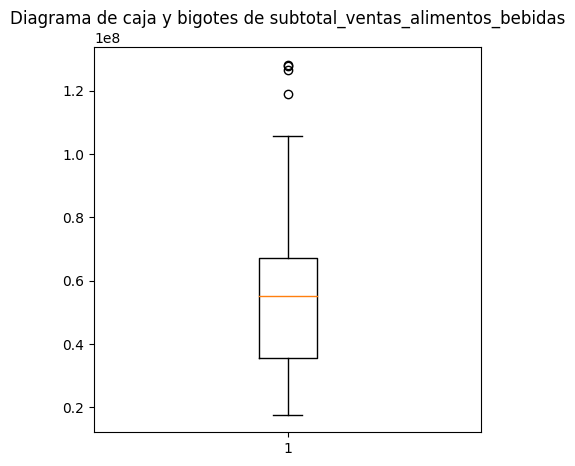

In [53]:
#Diagrama de caja y bigotes
fig = plt.figure(figsize=(5,5)) #Tamaño de la gráfica (largo x alto)
plt.boxplot(x=data1["subtotal_ventas_alimentos_bebidas"]) #Le indicamos la variable a graficar
plt.title("Diagrama de caja y bigotes de subtotal_ventas_alimentos_bebidas") #Título de la gráfica
plt.show() #Imprimimos

In [54]:
#Identificamos outliers
y = data1["subtotal_ventas_alimentos_bebidas"]

percentile25 = y.quantile(0.25) #Q1
percentile75 = y.quantile(0.75) #Q3

iqr = percentile75 - percentile25 #50% de los datos

limite_superior_iqr = percentile75 + 1.5*iqr
limite_inferior_iqr = percentile25 - 1.5*iqr

print("Límite superior:",round(limite_superior_iqr,1))
print("Límite inferior:",round(limite_inferior_iqr,1))

#Encontramos los outliers de la columan "Precio Venta"
outliers = data1[(data1["subtotal_ventas_alimentos_bebidas"]>limite_superior_iqr)|(data1["subtotal_ventas_alimentos_bebidas"]<limite_inferior_iqr)]
outliers #Ahora si nos arroja los 4 datos que logramos identificar en el diagrama de caja y bigote

Límite superior: 114548006.9
Límite inferior: -11790049.0


,Unnamed: 0,indice_tiempo,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros
59,59,01/12/2021,183983.2,31595.7,183983151.9,178866721.2,5.116431e+06,183983151.9,56640033.15,55432191.37,...,45199914.72,5859939.041,16275221.46,21265049.45,5863700.608,1679028.685,21753939.73,4759532.634,12669269.76,16665123.15
62,62,01/03/2022,16.5,24612.4,168982502.3,164321107.3,4.661350e+05,168982502.3,51262080.99,47364363.88,...,45418860.16,5922819.509,18419163.96,20827602.02,6886240.029,1589119.305,22942013.09,3912852.426,10898787.99,4634783.40
63,63,01/04/2022,177148.1,24140.5,177148082.8,173003799.1,4.144284e+06,177148082.8,53189998.68,50063972.79,...,49991675.91,6746166.557,19309461.59,22877841.24,6510665.781,1719458.547,23131265.85,4228053.874,3215054.70,11910475.62
64,64,01/05/2022,179639.2,23234.2,179639238.6,175358487.5,4.280751e+06,179639238.6,52738110.62,49886787.86,...,50150351.46,6667329.665,20121124.43,22841532.85,6314109.470,1779482.857,23578638.71,5213152.564,12039595.55,12349980.06


In [55]:
#Obtenemos el dataframe sin datos atípicos
clean_data4 = data1[(data1["subtotal_ventas_alimentos_bebidas"]<=limite_superior_iqr)&(data1["subtotal_ventas_alimentos_bebidas"]>=limite_inferior_iqr)]

#Pasamos el frame a un archivo csv
clean_data4.to_csv("clean_data4_act3.csv")

#Descargar archivo
from google.colab import files

files.download("clean_data4_act3.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##Columna "bebidas"

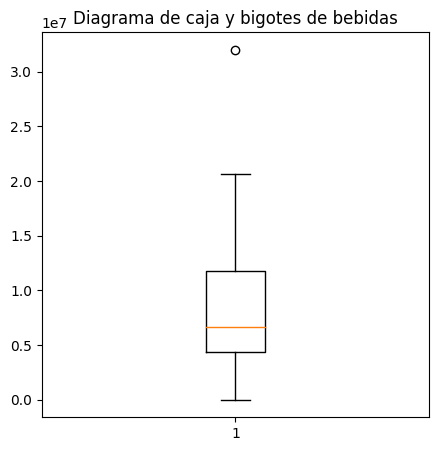

In [56]:
#Diagrama de caja y bigotes
fig = plt.figure(figsize=(5,5)) #Tamaño de la gráfica (largo x alto)
plt.boxplot(x=data1["bebidas"]) #Le indicamos la variable a graficar
plt.title("Diagrama de caja y bigotes de bebidas") #Título de la gráfica
plt.show() #Imprimimos

In [57]:
#Identificamos outliers
y = data1["bebidas"]

percentile25 = y.quantile(0.25) #Q1
percentile75 = y.quantile(0.75) #Q3

iqr = percentile75 - percentile25 #50% de los datos

limite_superior_iqr = percentile75 + 1.5*iqr
limite_inferior_iqr = percentile25 - 1.5*iqr

print("Límite superior:",round(limite_superior_iqr,1))
print("Límite inferior:",round(limite_inferior_iqr,1))

#Encontramos los outliers de la columan "Precio Venta"
outliers = data1[(data1["bebidas"]>limite_superior_iqr)|(data1["bebidas"]<limite_inferior_iqr)]
outliers #Ahora si nos arroja los 4 datos que logramos identificar en el diagrama de caja y bigote

Límite superior: 22865338.6
Límite inferior: -6791560.4


,Unnamed: 0,indice_tiempo,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros
59,59,01/12/2021,183983.2,31595.7,183983151.9,178866721.2,5116430.634,183983151.9,56640033.15,55432191.37,...,45199914.72,5859939.041,16275221.46,21265049.45,5863700.608,1679028.685,21753939.73,4759532.634,12669269.76,16665123.15


In [58]:
#Obtenemos el dataframe sin datos atípicos
clean_data5 = data1[(data1["bebidas"]<=limite_superior_iqr)&(data1["bebidas"]>=limite_inferior_iqr)]

#Pasamos el frame a un archivo csv
clean_data5.to_csv("clean_data5_act3.csv")

#Descargar archivo
from google.colab import files

files.download("clean_data5_act3.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##Columna "panaderia"

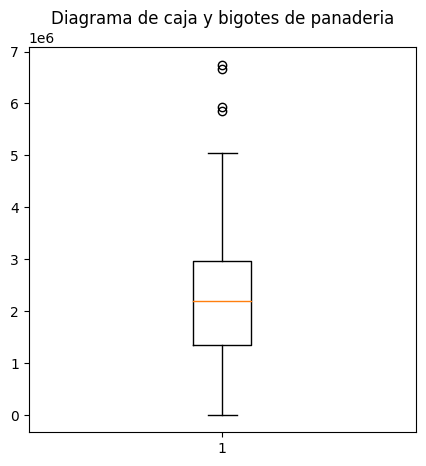

In [59]:
#Diagrama de caja y bigotes
fig = plt.figure(figsize=(5,5)) #Tamaño de la gráfica (largo x alto)
plt.boxplot(x=data1["panaderia"]) #Le indicamos la variable a graficar
plt.title("Diagrama de caja y bigotes de panaderia") #Título de la gráfica
plt.show() #Imprimimos

In [60]:
#Identificamos outliers
y = data1["panaderia"]

percentile25 = y.quantile(0.25) #Q1
percentile75 = y.quantile(0.75) #Q3

iqr = percentile75 - percentile25 #50% de los datos

limite_superior_iqr = percentile75 + 1.5*iqr
limite_inferior_iqr = percentile25 - 1.5*iqr

print("Límite superior:",round(limite_superior_iqr,1))
print("Límite inferior:",round(limite_inferior_iqr,1))

#Encontramos los outliers de la columan "Precio Venta"
outliers = data1[(data1["panaderia"]>limite_superior_iqr)|(data1["panaderia"]<limite_inferior_iqr)]
outliers #Ahora si nos arroja los 4 datos que logramos identificar en el diagrama de caja y bigote

Límite superior: 5413785.0
Límite inferior: -1094461.7


,Unnamed: 0,indice_tiempo,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros
59,59,01/12/2021,183983.2,31595.7,183983151.9,178866721.2,5.116431e+06,183983151.9,56640033.15,55432191.37,...,45199914.72,5859939.041,16275221.46,21265049.45,5863700.608,1679028.685,21753939.73,4759532.634,12669269.76,16665123.15
62,62,01/03/2022,16.5,24612.4,168982502.3,164321107.3,4.661350e+05,168982502.3,51262080.99,47364363.88,...,45418860.16,5922819.509,18419163.96,20827602.02,6886240.029,1589119.305,22942013.09,3912852.426,10898787.99,4634783.40
63,63,01/04/2022,177148.1,24140.5,177148082.8,173003799.1,4.144284e+06,177148082.8,53189998.68,50063972.79,...,49991675.91,6746166.557,19309461.59,22877841.24,6510665.781,1719458.547,23131265.85,4228053.874,3215054.70,11910475.62
64,64,01/05/2022,179639.2,23234.2,179639238.6,175358487.5,4.280751e+06,179639238.6,52738110.62,49886787.86,...,50150351.46,6667329.665,20121124.43,22841532.85,6314109.470,1779482.857,23578638.71,5213152.564,12039595.55,12349980.06


In [61]:
#Obtenemos el dataframe sin datos atípicos
clean_data6 = data1[(data1["panaderia"]<=limite_superior_iqr)&(data1["panaderia"]>=limite_inferior_iqr)]

#Pasamos el frame a un archivo csv
clean_data6.to_csv("clean_data6_act3.csv")

#Descargar archivo
from google.colab import files

files.download("clean_data6_act3.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Método desviación estandar

##Columna "indumentaria_calzado_textiles_hogar"

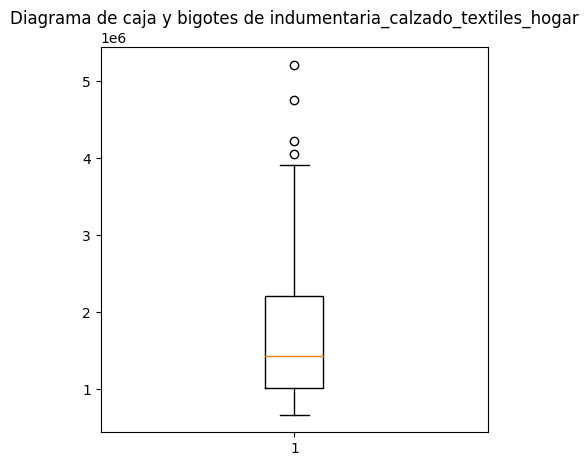

In [62]:
#Diagrama de caja y bigotes
fig = plt.figure(figsize=(5,5)) #Tamaño de la gráfica (largo x alto)
plt.boxplot(x=data1["indumentaria_calzado_textiles_hogar"]) #Le indicamos la variable a graficar
plt.title("Diagrama de caja y bigotes de indumentaria_calzado_textiles_hogar") #Título de la gráfica
plt.show() #Imprimimos

In [63]:
y = data1["indumentaria_calzado_textiles_hogar"]
limite_superior = y.mean() + 2.5*y.std()
limite_inferior = y.mean() - 2.5*y.std()

print("Límite superior:",round(limite_superior,1))
print("Límite inferior:",round(limite_inferior,1))

#Encontramos los outliers de la columan "Precio Venta"
outliers = data1[(data1["indumentaria_calzado_textiles_hogar"]>limite_superior)|(data1["indumentaria_calzado_textiles_hogar"]<limite_inferior)]
outliers #Solo indetifica 2 de 4 valores atípicos debido a que este método es más permisible

Límite superior: 4527986.9
Límite inferior: -887843.2


,Unnamed: 0,indice_tiempo,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros
59,59,01/12/2021,183983.2,31595.7,183983151.9,178866721.2,5116430.634,183983151.9,56640033.15,55432191.37,...,45199914.72,5859939.041,16275221.46,21265049.45,5863700.608,1679028.685,21753939.73,4759532.634,12669269.76,16665123.15
64,64,01/05/2022,179639.2,23234.2,179639238.6,175358487.5,4280751.113,179639238.6,52738110.62,49886787.86,...,50150351.46,6667329.665,20121124.43,22841532.85,6314109.470,1779482.857,23578638.71,5213152.564,12039595.55,12349980.06


In [64]:
#Obtenemos el ddataframe sin datos atípicos
clean_data7 = data1[(data1["indumentaria_calzado_textiles_hogar"]<=limite_superior)&(data1["indumentaria_calzado_textiles_hogar"]>=limite_inferior)]

#Pasamos el frame a un archivo csv
clean_data7.to_csv("clean_data7_act3.csv")

#Descargar archivo
from google.colab import files

files.download("clean_data7_act3.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##Columna "electronicos_articulos_hogar"

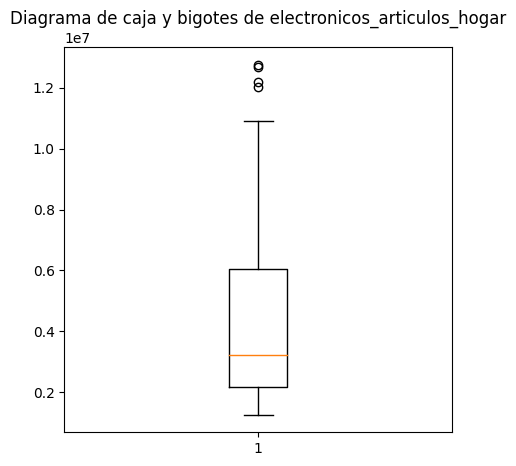

In [65]:
#Diagrama de caja y bigotes
fig = plt.figure(figsize=(5,5)) #Tamaño de la gráfica (largo x alto)
plt.boxplot(x=data1["electronicos_articulos_hogar"]) #Le indicamos la variable a graficar
plt.title("Diagrama de caja y bigotes de electronicos_articulos_hogar") #Título de la gráfica
plt.show() #Imprimimos

In [66]:
y = data1["electronicos_articulos_hogar"]
limite_superior = y.mean() + 2.5*y.std()
limite_inferior = y.mean() - 2.5*y.std()

print("Límite superior:",round(limite_superior,1))
print("Límite inferior:",round(limite_inferior,1))

#Encontramos los outliers de la columan "Precio Venta"
outliers = data1[(data1["electronicos_articulos_hogar"]>limite_superior)|(data1["electronicos_articulos_hogar"]<limite_inferior)]
outliers #Solo indetifica 2 de 4 valores atípicos debido a que este método es más permisible

Límite superior: 12614990.8
Límite inferior: -3451589.6


,Unnamed: 0,indice_tiempo,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros
58,58,01/11/2021,141702.0,25026.6,141701960.7,135950778.8,5751181.809,141701960.7,43762928.15,39925207.45,...,36354580.02,4509964.850,14720418.14,15761449.15,4869397.981,1213625.230,18664160.82,3209173.083,12754368.89,11464394.10
59,59,01/12/2021,183983.2,31595.7,183983151.9,178866721.2,5116430.634,183983151.9,56640033.15,55432191.37,...,45199914.72,5859939.041,16275221.46,21265049.45,5863700.608,1679028.685,21753939.73,4759532.634,12669269.76,16665123.15


In [67]:
#Obtenemos el ddataframe sin datos atípicos
clean_data8 = data1[(data1["electronicos_articulos_hogar"]<=limite_superior)&(data1["electronicos_articulos_hogar"]>=limite_inferior)]

#Pasamos el frame a un archivo csv
clean_data8.to_csv("clean_data8_act3.csv")

#Descargar archivo
from google.colab import files

files.download("clean_data8_act3.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##Columna "otros"

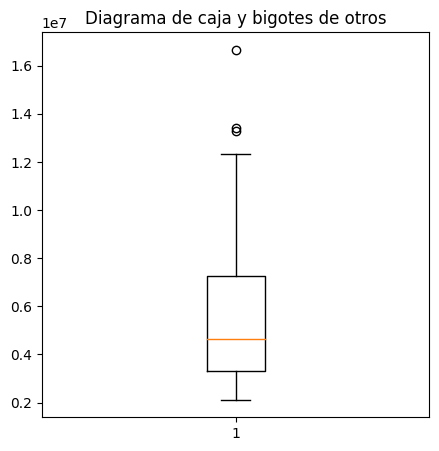

In [68]:
#Diagrama de caja y bigotes
fig = plt.figure(figsize=(5,5)) #Tamaño de la gráfica (largo x alto)
plt.boxplot(x=data1["otros"]) #Le indicamos la variable a graficar
plt.title("Diagrama de caja y bigotes de otros") #Título de la gráfica
plt.show() #Imprimimos

In [69]:
y = data1["otros"]
limite_superior = y.mean() + 2.5*y.std()
limite_inferior = y.mean() - 2.5*y.std()

print("Límite superior:",round(limite_superior,1))
print("Límite inferior:",round(limite_inferior,1))

#Encontramos los outliers de la columan "Precio Venta"
outliers = data1[(data1["otros"]>limite_superior)|(data1["otros"]<limite_inferior)]
outliers #Solo indetifica 1 de 3 valores atípicos debido a que este método es más permisible

Límite superior: 13784452.5
Límite inferior: -2372903.3


,Unnamed: 0,indice_tiempo,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros
59,59,01/12/2021,183983.2,31595.7,183983151.9,178866721.2,5116430.634,183983151.9,56640033.15,55432191.37,...,45199914.72,5859939.041,16275221.46,21265049.45,5863700.608,1679028.685,21753939.73,4759532.634,12669269.76,16665123.15


In [70]:
#Obtenemos el ddataframe sin datos atípicos
clean_data9 = data1[(data1["otros"]<=limite_superior)&(data1["otros"]>=limite_inferior)]

#Pasamos el frame a un archivo csv
clean_data9.to_csv("clean_data9_act3.csv")

#Descargar archivo
from google.colab import files

files.download("clean_data9_act3.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Columna "lacteos"

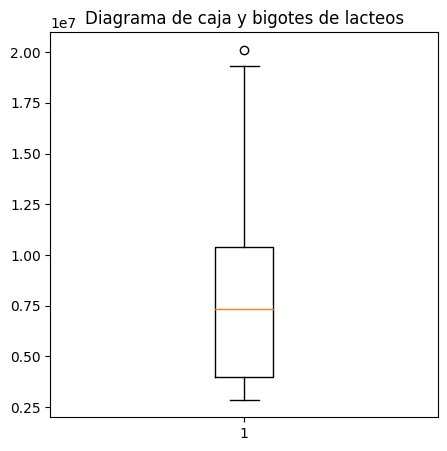

In [74]:
data#Diagrama de caja y bigotes
fig = plt.figure(figsize=(5,5)) #Tamaño de la gráfica (largo x alto)
plt.boxplot(x=data1["lacteos"]) #Le indicamos la variable a graficar
plt.title("Diagrama de caja y bigotes de lacteos") #Título de la gráfica
plt.show() #Imprimimos

In [72]:
y = data1["lacteos"]
limite_superior = y.mean() + 2.5*y.std()
limite_inferior = y.mean() - 2.5*y.std()

print("Límite superior:",round(limite_superior,1))
print("Límite inferior:",round(limite_inferior,1))

#Encontramos los outliers de la columan "Precio Venta"
outliers = data1[(data1["lacteos"]>limite_superior)|(data1["lacteos"]<limite_inferior)]
outliers #Solo indetifica 1 de 3 valores atípicos debido a que este método es más permisible

Límite superior: 19950122.3
Límite inferior: -3501979.3


,Unnamed: 0,indice_tiempo,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros
64,64,01/05/2022,179639.2,23234.2,179639238.6,175358487.5,4280751.113,179639238.6,52738110.62,49886787.86,...,50150351.46,6667329.665,20121124.43,22841532.85,6314109.47,1779482.857,23578638.71,5213152.564,12039595.55,12349980.06


In [73]:
#Obtenemos el ddataframe sin datos atípicos
clean_data10 = data1[(data1["lacteos"]<=limite_superior)&(data1["lacteos"]>=limite_inferior)]

#Pasamos el frame a un archivo csv
clean_data10.to_csv("clean_data10_act3.csv")

#Descargar archivo
from google.colab import files

files.download("clean_data10_act3.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>